In [10]:
from datahandling import access_db
from data_processing_pipeline import equip_dtypes_for_scoring
from tinydb import Query
from matplotlib.pyplot import plot, figure, ylim
from model_analysis import translate_model_code
from numpy import argmax
% matplotlib inline

In [6]:
db = access_db(2, True)

Accessed db: Only_Top_Models


In [7]:
e_d = equip_dtypes_for_scoring()

Accessed db: Single_Value_Database


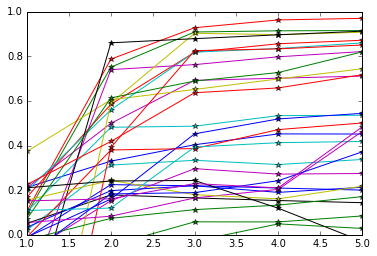

In [11]:
for i in e_d:
    en, dt = i
    top_mod = db.search((Query().equipment_name == en) &
                        (Query().data_type == dt))
    
    n_terms = []
    scores = []
    mcodes = []
#     print '___________________'
#     print en, dt
#     print top_mod
    for j in top_mod:
        nt = j['n_terms']
        ts = j['top_scores'][0]
        mc = j['top_mcodes'][0]
        n_terms.append(nt)
        scores.append(ts)
        mcodes.append(mc)
#         tr_mc = translate_model_code(j['top_mcodes'][0])
#         print tr_mc, 'with a score of', round(ts, 2)

    ind_max = argmax(scores)
    top_score_model = mcodes[ind_max]
    
    t_mc = translate_model_code(top_score_model)
    
    t_mc_str = ''
    for n, term in enumerate(t_mc):
        if (n + 1) == len(t_mc):
            t_mc_str += term
        else:
            t_mc_str += term + ' + '
    
#     print ''
    
    
#     fig = figure()
    plot(n_terms, scores, '-*')
    ylim([0, 1])
    
#     fig.suptitle('Best Model: (' + t_mc_str + ') for ' + en + ' ' + dt)